In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import pysal as ps
import shapely
from shapely.geometry import *
import pyproj

from fiona.crs import from_epsg

/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [2]:
# loading in building data as a shapefile
buildings_shp = ps.open('./CHARIM_Data/Buildings/buildings_1/buildings_1.shp')
buildings_df = pd.read_csv('./CHARIM_Data/Buildings/buildings_1.csv')

---

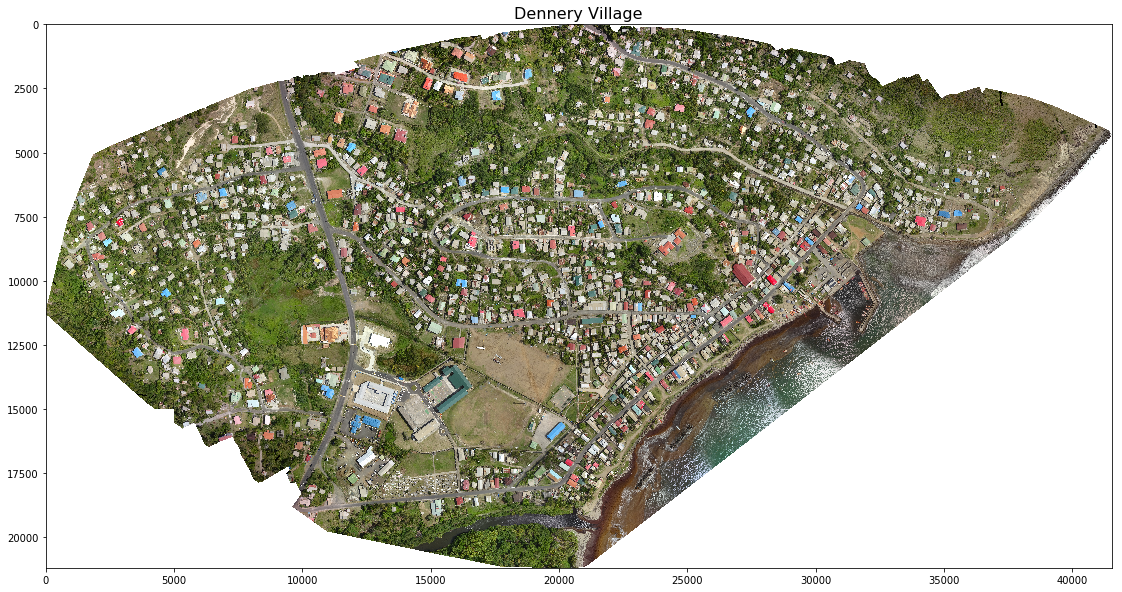

In [3]:
#Visualizing the drone image with RGB scale
path = './Client_Data//RBG/st_luc_dannery_transparent_mosaic_group1.tif'

img = rio.open(path)
dennery_im = img.read(masked = True)
profile = img.profile

fig, ax = plt.subplots(figsize = (20,10))
show(dennery_im, 
     cmap='terrain', 
     ax=ax)
ax.set_title("Dennery Village", fontsize = 16);

In [4]:
# checking the images coordinate reference system
img.crs

CRS({'init': 'epsg:32620'})

In [5]:
# listing the image's boundaries
img.bounds

BoundingBox(left=727036.01578, bottom=1538503.9624200002, right=728766.32222, top=1539386.4878600002)

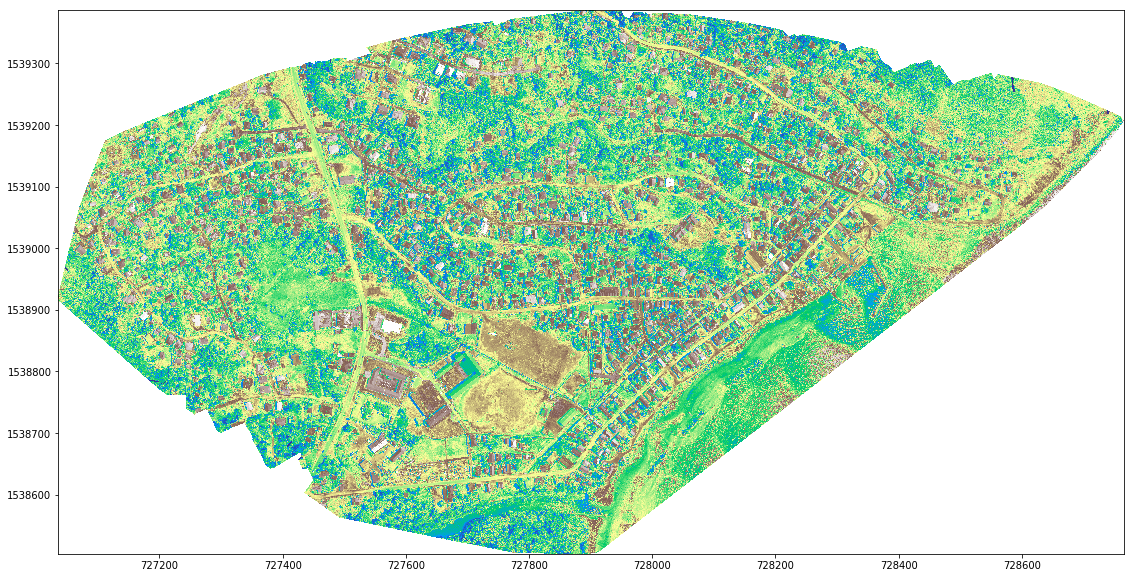

In [6]:
#opening image with rasterio to show coordinates
fig, ax = plt.subplots(figsize=(20,10))
show(img, cmap='terrain', adjust='linear', ax=ax);

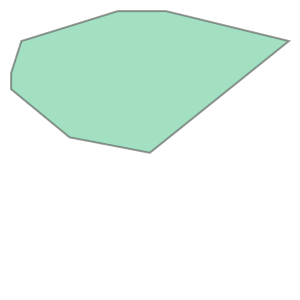

In [7]:
# building a polygon manually for later use as a filter
coords = ((727900.0, img.bounds.bottom),
          (727400.0, 1538600.0,),
          (img.bounds.left, 1538900.0,),
          (img.bounds.left, 1539000.0,),
          (727100.0, 1539200.0,),
          (727700.0, img.bounds.top,),
          (728000, img.bounds.top,),
          (img.bounds.right, 1539200.0))

img_polygon = Polygon(coords)
img_polygon

In [8]:
# p converts lat long coordinates to UTM 20 xy coordinates (meters)
p = pyproj.Proj(proj='utm', zone=20)

In [9]:
# testing p function
x,y = p(-60.89501904137776, 13.906176892180355)
print(x,y)

727456.0194610965 1538354.4741449296


In [10]:
# converting all building bounding boxes in the Dennery district into a format that can
# be by rasterio to cut out buildings (). The result is an iterable list

# initalizing the building list
bbox_list = []
OID_list = []

for i in range(len(buildings_shp)):
    #setting coords equal to the bounding box of each building
    coords = buildings_shp[i].bbox
    
    # converting the corrdinates of the bounding box to UTM 20 xy coordinates
    bbox = box(p(coords[0], coords[1])[0],
               p(coords[0], coords[1])[1],
               p(coords[2], coords[3])[0],
               p(coords[2], coords[3])[1])
    
    # using the filter built earlier to remove buildings that are withing the drone 
    # data's bounding box but outside of the acutual image data
    if img_polygon.contains(bbox.centroid):
        # coverting the bounding box to a dataframe with the bounding box as the geometry
        gdf = gpd.GeoDataFrame({'geometry': bbox},
                                index = [0],
                                crs=from_epsg(32620))
        
        OID_list.append(buildings_df.iloc[i].OID_)
        
    
        # appending the bounding box in a json format that can be easily used by rasterio
        bbox_list.append([json.loads(gdf.to_json())['features'][0]['geometry']])

/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 3682 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 4464 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 4946 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 3682 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 4464 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 4946 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 11197 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 11506 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 11197 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 11506 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 14285 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 14305 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 15027 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 14285 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 14305 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 15027 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 23001 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 23544 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 23001 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 23544 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 26670 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 26670 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 29100 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 29100 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 33487 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 33497 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 34243 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 33487 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 33497 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 34243 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 57477 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 57477 topology has been fixed. (ccw -> cw)


/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 65030 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/pysal/core/IOHandlers/pyShpIO.py:172: RuntimeWarning: SHAPEFILE WARNING: Polygon 65041 topology has been fixed. (ccw -> cw)
  warn("SHAPEFILE WARNING: Polygon %d topology has been fixed. (ccw -> cw)" % (self.pos), RuntimeWarning)


SHAPEFILE WARNING: Polygon 65030 topology has been fixed. (ccw -> cw)
SHAPEFILE WARNING: Polygon 65041 topology has been fixed. (ccw -> cw)


In [11]:
bbox_list[0]

[{'type': 'Polygon',
  'coordinates': [[[727647.9933357221, 1538589.729625155],
    [727647.9933357221, 1538594.474082089],
    [727642.2525636314, 1538594.474082089],
    [727642.2525636314, 1538589.729625155],
    [727647.9933357221, 1538589.729625155]]]}]

In [12]:
len(bbox_list)

1477

In [13]:
len(OID_list)

1477

In [14]:
# # iterating through all the bounding boxes for buildings within the filter and cropping
# # the drone data with those bounding boxes and saving the images to a specified folder

# for i in range(len(bbox_list)):
#     # using try accept in case the centroid of a building is in the specified filter but 
#     # at least one vertice is out of bounds 
#     try:
#         # this will error if part of the bounding box is out of bounds
#         out_img, out_transform = mask(dataset=img, shapes=bbox_list[i], crop=True)
#         # copying meta data from original raster and seting epsg code
#         out_meta = img.meta.copy()
#         epsg_code = int(img.crs.data['init'][5:])
#         # updating the meta data
#         out_meta.update({"driver": "jpeg",
#                      "height": out_img.shape[1],
#                      "width": out_img.shape[2],
#                      "transform": out_transform}
#                    )
#         # writing images to file path with the OIR in the image name
#         with rio.open(f"./roof_images/building_{OID_list[i]}.jpeg", "w", **out_meta) as dest:
#             dest.write(out_img)  
            
#     except:
#         # prints the OID for any image that errors
#         print(f"bounding box {OID_list[i]} produced an error")
#         # skipping over the bounding box
#         pass